In [57]:
import pandas as pd
from datetime import timedelta
%pylab inline

df_goog = pd.read_csv('../../assets/datasets/goog.csv')

Populating the interactive namespace from numpy and matplotlib


Take a high-level look at the data. Describe it. What are we looking at? Hint: We can use our `plot` function to provide a good visual.

In [58]:
df_goog.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-01,747.109985,775.955017,745.630005,762.369995,2519600,762.369995
1,2015-11-02,711.059998,762.708008,705.849976,742.599976,1795300,742.599976
2,2015-10-01,608.369995,730.000000,599.849976,710.809998,2337100,710.809998
3,2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983
4,2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000


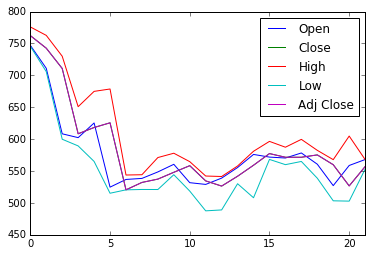

In [59]:
df_goog.describe()
df_goog.dtypes
# df_goog.plot() # this considers volume, which blows up graph and isn't proper unit

df_goog[['Open','Close','High','Low','Adj Close']].plot()

Looking a little deeper, let's gauge the integrity of our data. Is there any cleaning we can do? 

In [60]:
df_goog['Open'].unique()
df_goog['High'].unique()
df_goog['Low'].unique()
df_goog['Close'].unique()
df_goog['Volume'].unique()
df_goog['Adj Close'].unique()
df_goog['Date'].unique()

array(['2015-12-01', '2015-11-02', '2015-10-01', '2015-09-01',
       '2015-08-03', '2015-07-01', '2015-06-01', '2015-05-01',
       '2015-04-01', '2015-03-02', '2015-02-02', '2015-01-02',
       '2014-12-01', '2014-11-03', '2014-10-01', '2014-09-02',
       '2014-08-01', '2014-07-01', '2014-06-02', '2014-05-01',
       '2014-04-01', '2014-03-27'], dtype=object)

Let's examine the Date column. We should probably make it the index for our DataFrame, as we need to order the data by time. Doing this will result in 6 Series objects indexed by DateTime- literal Time Series!

In [61]:
df_goog.Date
type(df_goog.Date.loc[0])

str

We need to convert the string to a DateTime object. Pandas has a built in function for this! Easy peasy. We should also ensure that the dates are sorted.

In [62]:
df_goog.sort_values('Date', inplace=True)
df_goog.set_index('Date', inplace=True)
df_goog.index = df_goog.index.to_datetime()

Let's add some more columns with useful data extracted from the DateTime index.

In [63]:
df_goog['Year'] = df_goog.index.year
df_goog['Month'] = df_goog.index.month
df_goog['Day'] = df_goog.index.day

Let's walk through adding a dummy variable to flag days where the Close price was higher than the Open price

In [64]:
#Insructor Note: Walk the students through creating the dummy variable. 
# Two possible solutions:
df_goog['Closed_Higher'] = df_goog.Open > df_goog.Close
#OR
# df_goog['Closed_Higher'] = pd.get_dummies(df_goog.Open > df_goog.Close).values

We can use the DateTime object to access various different cuts of data using date attributes. For example, if we wanted to get all of the cuts from 2015, we would do as such:

In [65]:
df_goog['2015']

,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day,Closed_Higher
2015-01-02,529.012390,542.172424,487.562195,534.522461,2791200,534.522461,2015,1,2,False
2015-02-02,531.732361,564.712585,518.552307,558.402588,1841600,558.402588,2015,2,2,False
2015-03-02,560.532532,577.912598,544.222473,548.002441,1828900,548.002441,2015,3,2,True
2015-04-01,548.602417,571.142578,521.012390,537.340027,2116700,537.340027,2015,4,1,True
2015-05-01,538.429993,544.190002,521.085022,532.109985,1723100,532.109985,2015,5,1,True
2015-06-01,536.789978,543.739990,520.500000,520.510010,1662400,520.510010,2015,6,1,True
2015-07-01,524.729980,678.640015,515.179993,625.609985,2955600,625.609985,2015,7,1,False
2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000,2015,8,3,True
2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983,2015,9,1,False
2015-10-01,608.369995,730.000000,599.849976,710.809998,2337100,710.809998,2015,10,1,False


Let's recall the TimeDelta object. We can use this to shift our entire index by a given offset.

In [66]:
df_goog.index + timedelta(days=1)

DatetimeIndex(['2014-03-28', '2014-04-02', '2014-05-02', '2014-06-03',
               '2014-07-02', '2014-08-02', '2014-09-03', '2014-10-02',
               '2014-11-04', '2014-12-02', '2015-01-03', '2015-02-03',
               '2015-03-03', '2015-04-02', '2015-05-02', '2015-06-02',
               '2015-07-02', '2015-08-04', '2015-09-02', '2015-10-02',
               '2015-11-03', '2015-12-02'],
              dtype='datetime64[ns]', freq=None)

On your own, try to shift the entire time series **both** forwards and backwards by the following intervals:
- 1 hour
- 3 days
- 12 years, 1 hour, and 43 seconds

In [67]:
df_goog.index + timedelta(hours=1)
df_goog.index - timedelta(hours=1)

df_goog.index + timedelta(days=3)
df_goog.index - timedelta(days=3)

df_goog.index + timedelta(days=4380, hours=1, seconds=43)
df_goog.index - timedelta(days=4380, hours=1, seconds=43)

DatetimeIndex(['2002-03-29 22:59:17', '2002-04-03 22:59:17',
               '2002-05-03 22:59:17', '2002-06-04 22:59:17',
               '2002-07-03 22:59:17', '2002-08-03 22:59:17',
               '2002-09-04 22:59:17', '2002-10-03 22:59:17',
               '2002-11-05 22:59:17', '2002-12-03 22:59:17',
               '2003-01-04 22:59:17', '2003-02-04 22:59:17',
               '2003-03-04 22:59:17', '2003-04-03 22:59:17',
               '2003-05-03 22:59:17', '2003-06-03 22:59:17',
               '2003-07-03 22:59:17', '2003-08-05 22:59:17',
               '2003-09-03 22:59:17', '2003-10-03 22:59:17',
               '2003-11-04 22:59:17', '2003-12-03 22:59:17'],
              dtype='datetime64[ns]', freq=None)

## Discussion: Date ranges and Frequencies

/Users/jb3/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


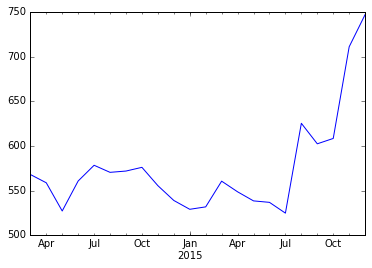

In [76]:
df_goog.Open.resample('M').plot()


In [81]:
df_goog.Close

2014-03-27    556.972473
2014-04-01    526.662415
2014-05-01    559.892578
2014-06-02    575.282593
2014-07-01    571.602539
2014-08-01    571.602539
2014-09-02    577.362610
2014-10-01    559.082520
2014-11-03    541.832458
2014-12-01    526.402405
2015-01-02    534.522461
2015-02-02    558.402588
2015-03-02    548.002441
2015-04-01    537.340027
2015-05-01    532.109985
2015-06-01    520.510010
2015-07-01    625.609985
2015-08-03    618.250000
2015-09-01    608.419983
2015-10-01    710.809998
2015-11-02    742.599976
2015-12-01    762.369995
Name: Close, dtype: float64

In [83]:
df_goog.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Adj Close        float64
Year               int32
Month              int32
Day                int32
Closed_Higher       bool
dtype: object

In [80]:
df_goog.Close.asfreq('D', method='backfill')

2014-03-27    556.972473
2014-03-28    526.662415
2014-03-29    526.662415
2014-03-30    526.662415
2014-03-31    526.662415
2014-04-01    526.662415
2014-04-02    559.892578
2014-04-03    559.892578
2014-04-04    559.892578
2014-04-05    559.892578
2014-04-06    559.892578
2014-04-07    559.892578
2014-04-08    559.892578
2014-04-09    559.892578
2014-04-10    559.892578
2014-04-11    559.892578
2014-04-12    559.892578
2014-04-13    559.892578
2014-04-14    559.892578
2014-04-15    559.892578
2014-04-16    559.892578
2014-04-17    559.892578
2014-04-18    559.892578
2014-04-19    559.892578
2014-04-20    559.892578
2014-04-21    559.892578
2014-04-22    559.892578
2014-04-23    559.892578
2014-04-24    559.892578
2014-04-25    559.892578
                 ...    
2015-11-02    742.599976
2015-11-03    762.369995
2015-11-04    762.369995
2015-11-05    762.369995
2015-11-06    762.369995
2015-11-07    762.369995
2015-11-08    762.369995
2015-11-09    762.369995
2015-11-10    762.369995


Note that `asfreq` gives us a `method` keyword argument. Backfill, or bfill, will propogate the last valid observation forward. In other words, it will use the value preceding a range of unknown indices to fill in the unknowns. Inversely, pad, or ffill, will use the first value succeeding a range of unknown indices to fill in the unknowns.

Now, let's discuss the following points:
- What does `asfreq` do?
- What does `resample` do?
- What is the difference?
- When would we want to use each?

We can also create our own date ranges using a built in function, `date_range`. The `periods` and `freq` keyword arguments grant the user finegrained control over the resulting values. To reset the time data, use the `normalize=True` directive.

**NOTE:** See Reference B in the lesson notes for all of the available offset aliases

In [84]:
index = pd.date_range('3/1/2016', '6/1/2016')

pd.date_range(start='3/1/2016', periods=20)
pd.date_range(end='6/1/2016', periods=20)
pd.date_range('1/1/2016', '12/1/2016', freq='BM')

pd.date_range('3/7/2016 12:56:31', periods=6)
pd.date_range('3/7/2012 12:56:31', periods=6, normalize=False)

DatetimeIndex(['2012-03-07 12:56:31', '2012-03-08 12:56:31',
               '2012-03-09 12:56:31', '2012-03-10 12:56:31',
               '2012-03-11 12:56:31', '2012-03-12 12:56:31'],
              dtype='datetime64[ns]', freq='D')

We are also given a Period object, which can be used to represent a time interval. The Period object consists of a start time and an end time, and can be created by providing a start time and a given frequency.

In [70]:
march_2016 = pd.Period('2016-03', freq='M')

march_2016.start_time
march_2016.end_time

Timestamp('2016-03-31 23:59:59.999999999')

Each of these objects can be used to alter and access data from our DataFrames. We'll try those out in our Independent Practice in a moment.